In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
#!pip install numpy pandas matplotlib pandas_datareader yfinance
#!pip install scikit-learn

In [3]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

symbol = 'COST'

# Calculate dynamic start date (5 years ago from today)
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Download data with yfinance
df = yf.download(symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

# Rename columns to match your original format
df = df.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
})

# Set index name to 'Date'
df.index.name = 'Date'

# Optional: convert all columns to numeric (usually already numeric)
df = df.apply(pd.to_numeric)

df

C:\Users\Nicholas Tam\AppData\Local\Temp\ipykernel_5204\1887781700.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Price,close,high,low,open,volume
Ticker,COST,COST,COST,COST,COST
Date,,,,,
2020-06-09,281.366791,284.175411,281.016890,283.162466,3155800
2020-06-10,283.005859,284.202986,281.458832,282.223156,2713700
2020-06-11,277.020386,284.727954,276.845449,282.692847,3443000
2020-06-12,275.058960,280.998448,272.802858,278.714750,4020000
2020-06-15,273.659241,274.478814,270.583593,273.539525,3266800
...,...,...,...,...,...
2025-06-02,1056.849976,1060.500000,1034.270020,1034.270020,2148000
2025-06-03,1055.589966,1067.079956,1043.260010,1054.150024,1992900


In [4]:
df.columns = df.columns.droplevel(1)
df.head()

Price,close,high,low,open,volume
Date,,,,,
2020-06-09,281.366791,284.175411,281.016890,283.162466,3155800
2020-06-10,283.005859,284.202986,281.458832,282.223156,2713700
2020-06-11,277.020386,284.727954,276.845449,282.692847,3443000
2020-06-12,275.058960,280.998448,272.802858,278.714750,4020000
2020-06-15,273.659241,274.478814,270.583593,273.539525,3266800


In [5]:
# Drop 'Price' only if it exists
df = df.drop(columns=['Price'], errors='ignore')

# Reset index to turn Date index into a regular integer index
df = df.reset_index(drop=True)

print(df.head())

Price       close        high         low        open   volume
0      281.366791  284.175411  281.016890  283.162466  3155800
1      283.005859  284.202986  281.458832  282.223156  2713700
2      277.020386  284.727954  276.845449  282.692847  3443000
3      275.058960  280.998448  272.802858  278.714750  4020000
4      273.659241  274.478814  270.583593  273.539525  3266800


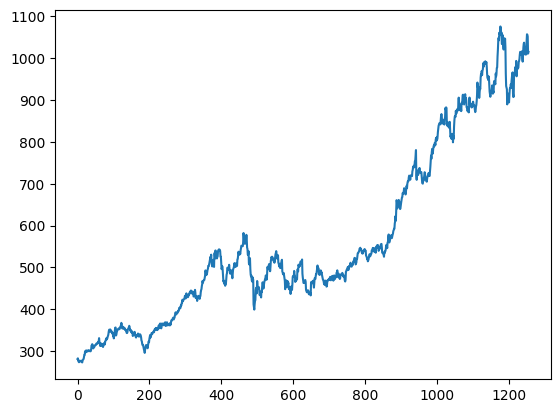

In [6]:
plt.plot(df.close)

In [7]:
ma100 = df.close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1251    982.467245
1252    983.831590
1253    985.097079
1254    985.858298
1255    986.782924
Name: close, Length: 1256, dtype: float64

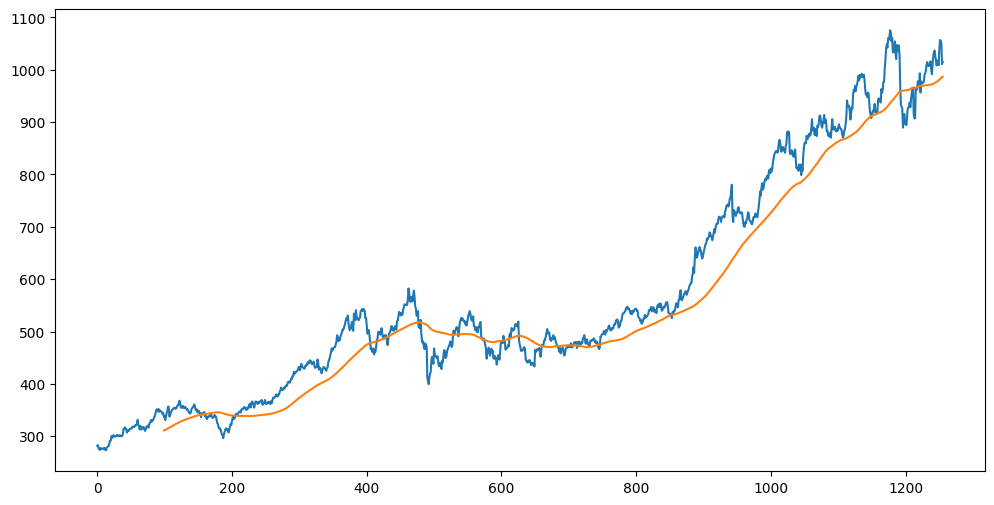

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100)

In [9]:
ma200 = df.close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1251    947.596998
1252    948.577475
1253    949.465526
1254    950.182850
1255    950.912058
Name: close, Length: 1256, dtype: float64

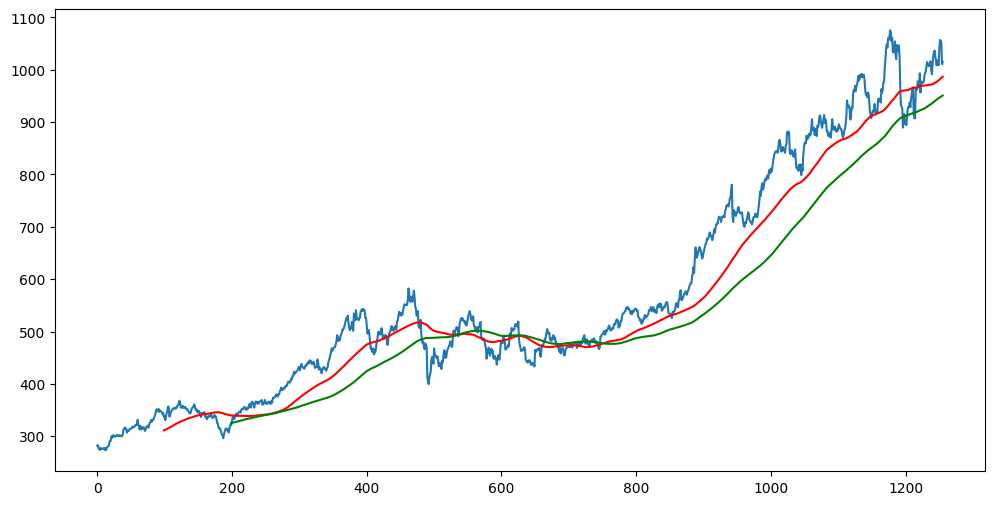

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(1256, 5)

In [12]:
# Splitting Data into Training and Testing

from sklearn.model_selection import train_test_split

train, test = train_test_split(df[['close']], test_size=0.30, shuffle=False)

print(train.shape)
print(test.shape)


(879, 1)
(377, 1)


In [13]:
train.head()

Price,close
0,281.366791
1,283.005859
2,277.020386
3,275.058960
4,273.659241


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(train)
data_training_array

array([[0.02677999],
       [0.03208221],
       [0.01271983],
       [0.00637482],
       [0.00184688],
       [0.01429848],
       [0.00908521],
       [0.00896615],
       [0.00994942],
       [0.01158779],
       [0.01408998],
       [0.00434896],
       [0.0118261 ],
       [0.        ],
       [0.014984  ],
       [0.01980939],
       [0.02439686],
       [0.02734586],
       [0.04447428],
       [0.05859427],
       [0.0588622 ],
       [0.08632741],
       [0.08838309],
       [0.07852291],
       [0.09365529],
       [0.08978315],
       [0.08850175],
       [0.08409335],
       [0.08921688],
       [0.09288082],
       [0.09454921],
       [0.08802552],
       [0.08704255],
       [0.09246412],
       [0.09237468],
       [0.08811486],
       [0.08626394],
       [0.08838358],
       [0.09969752],
       [0.13095353],
       [0.13149067],
       [0.14146151],
       [0.13429702],
       [0.13158031],
       [0.10898165],
       [0.12190781],
       [0.1187436 ],
       [0.120

In [16]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
# ML Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [19]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))  # Output shape will be (None, 30)


C:\Users\Nicholas Tam\Projects\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.2759
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0294
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0243
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0214
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0181
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0190
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0159
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0157
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0160
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0163
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0126
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0136
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0115
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0109
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - lo

In [22]:
model.save('keras_model.h5')

In [23]:
test.head()

Price,close
879,587.039124
880,589.056274
881,592.469910
882,592.304932
883,604.989258


In [24]:
past_100_days = train.tail(100)

In [25]:
final_df = pd.concat([past_100_days, test], ignore_index=True)

In [26]:
final_df

Price,close
0,528.194153
1,534.242126
2,534.850830
3,535.353088
4,538.106750
...,...
472,1056.849976
473,1055.589966
474,1051.689941
475,1010.809998


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02409531],
       [0.0348803 ],
       [0.03596577],
       [0.03686141],
       [0.04177186],
       [0.0433224 ],
       [0.05378022],
       [0.05595115],
       [0.05763948],
       [0.05016225],
       [0.05272925],
       [0.04816384],
       [0.03920475],
       [0.03382923],
       [0.0430294 ],
       [0.03329504],
       [0.04426974],
       [0.04032471],
       [0.04649248],
       [0.04957658],
       [0.0521093 ],
       [0.04954186],
       [0.04444236],
       [0.04537273],
       [0.02480146],
       [0.02106301],
       [0.01808242],
       [0.0097435 ],
       [0.01403366],
       [0.        ],
       [0.00397017],
       [0.00773333],
       [0.01909104],
       [0.01821074],
       [0.03032827],
       [0.02164563],
       [0.02247413],
       [0.02585754],
       [0.02918904],
       [0.03362504],
       [0.04672649],
       [0.04674379],
       [0.0484182 ],
       [0.057066  ],
       [0.0425493 ],
       [0.05352738],
       [0.05634101],
       [0.055

In [28]:
input_data.shape

(477, 1)

In [29]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [30]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(377, 100, 1)
(377,)


In [31]:
# Making Predictions

y_predicted = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


In [32]:
y_predicted.shape

(377, 1)

In [33]:
y_test

array([0.12903007, 0.13262714, 0.13871448, 0.13842028, 0.16103949,
       0.17079279, 0.19240914, 0.17300628, 0.22149587, 0.26026689,
       0.25421427, 0.22526577, 0.23245947, 0.24359624, 0.24881873,
       0.26151757, 0.25497354, 0.24963242, 0.23295426, 0.22241318,
       0.22888635, 0.24243415, 0.2524799 , 0.26218955, 0.27205866,
       0.27350895, 0.29059385, 0.28749876, 0.29227413, 0.29779212,
       0.3113397 , 0.30698891, 0.29828745, 0.29637719, 0.28468675,
       0.29703143, 0.3096419 , 0.32154458, 0.31118058, 0.32999092,
       0.33884715, 0.34182285, 0.34116741, 0.35709098, 0.36484869,
       0.36350277, 0.36174913, 0.34729589, 0.36134163, 0.36546875,
       0.36454763, 0.3675587 , 0.36282948, 0.38298607, 0.38923841,
       0.40238088, 0.40124742, 0.4070041 , 0.39979494, 0.4096253 ,
       0.42687694, 0.42824082, 0.45178049, 0.47365524, 0.36732851,
       0.34699483, 0.38737887, 0.3826319 , 0.37864649, 0.36745248,
       0.37792031, 0.37903625, 0.3941802 , 0.39743931, 0.38369

In [34]:
y_predicted

array([[0.22402784],
       [0.22355224],
       [0.22291838],
       [0.22215672],
       [0.22129324],
       [0.22036442],
       [0.21941066],
       [0.21848048],
       [0.21759385],
       [0.21679524],
       [0.21616274],
       [0.21574938],
       [0.21558239],
       [0.21571097],
       [0.21616343],
       [0.21695201],
       [0.21802208],
       [0.21944207],
       [0.22118816],
       [0.22327071],
       [0.22566378],
       [0.22836843],
       [0.23143573],
       [0.23474872],
       [0.23820396],
       [0.24182013],
       [0.24568275],
       [0.24974051],
       [0.25396872],
       [0.25830394],
       [0.2626248 ],
       [0.26698843],
       [0.2714651 ],
       [0.27603087],
       [0.28062412],
       [0.28509852],
       [0.2893387 ],
       [0.29330206],
       [0.29706287],
       [0.30068398],
       [0.30431575],
       [0.30818182],
       [0.31253526],
       [0.31755626],
       [0.32332033],
       [0.32986173],
       [0.3371555 ],
       [0.344

In [35]:
scaler.scale_

array([0.00178324])

In [36]:
scale_factor = 1 / scaler.scale_[0]
y_predicted = y_predicted *scale_factor
y_test = y_test * scale_factor

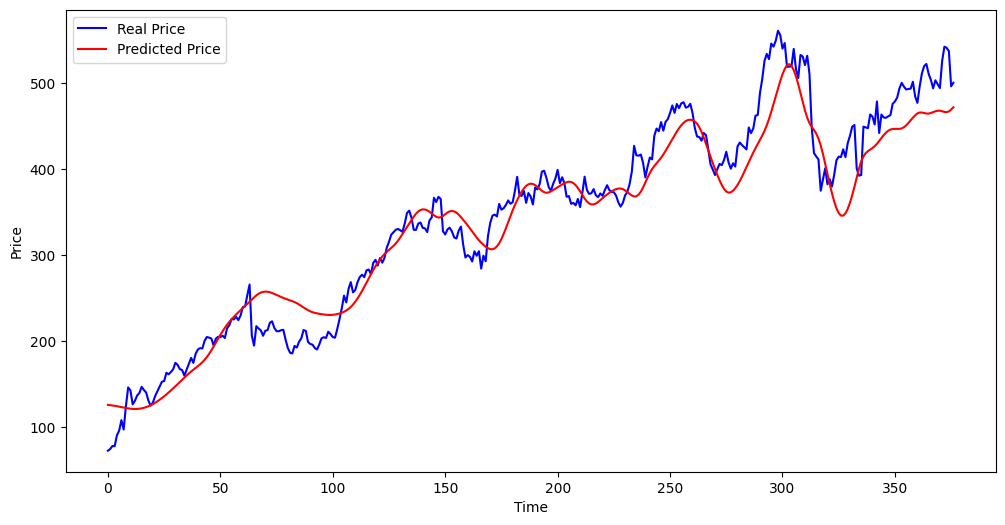

In [37]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Real Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()